In [136]:
import pandas as pd
import numpy as np
import string
import re
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english')) 

import matplotlib.pyplot as plt 

In [112]:
tweet_df=pd.read_csv("corona_tweets.csv")
tweet_df.head()

,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetcreatedts,retweetcount,text,hashtags
0,gailharris2018,Beyond Any Box. No Trains Please. 🚫,The Sunshine State 😎,1106,904,22537,3/19/2018 17:23,7/25/2020 18:46,0,@RealJamesWoods Glory Hole on #Plandemic2020 Bingo Card punched. #COVID19 #LiberalismIsAMentalDisorder #LiberalismIsAMentalDisease,"[{'text': 'Plandemic2020', 'indices': [30, 44]}, {'text': 'COVID19', 'indices': [65, 73]}, {'text': 'LiberalismIsAMentalDisorder', 'indices': [74, 102]}, {'text': 'LiberalismIsAMentalDisease', 'indices': [103, 130]}]"
1,LarryMcLau,NaN,NaN,10,9,5683,1/14/2012 1:30,7/25/2020 18:46,0,Hey @SenCoryGardner : Immigrant families need relief to survive the #COVID19 pandemic. Do your job and #StandWithImmigrants by supporting inclusive relief measures NOW. https://t.co/hYm2lWpz6k,"[{'text': 'COVID19', 'indices': [68, 76]}, {'text': 'StandWithImmigrants', 'indices': [103, 123]}]"
2,elisaperego78,Hon Res Associate @UCLarchaeology @marginality_IoA @CoPOWER_MSCA #archaeology #collapse #bioarchaeology #inequality #disability #LongCovid Lombardy (views own),"Vienna, Austria",577,686,7267,5/19/2011 9:56,7/25/2020 18:46,0,@MECFSNews @TomKindlon But I have also seen people in the #MECFS community and MDs/ researchers working on ME providing wrong or imprecise information on #COVID19. It's key to look at research on covid first and foremost before making certain claims or providing certain descriptions of #LongCovid,"[{'text': 'MECFS', 'indices': [58, 64]}, {'text': 'COVID19', 'indices': [154, 162]}, {'text': 'LongCovid', 'indices': [287, 297]}]"
3,DailyNewsEgypt,Egypt's Only Daily Independent Newspaper in English,Egypt,106,271823,84661,4/26/2009 7:56,7/25/2020 18:46,0,"#COVID19 sees varied market impacts of profits, losses on Egyptian companies https://t.co/vbY8l8ojW3","[{'text': 'COVID19', 'indices': [0, 8]}]"
4,LarryMcLau,NaN,NaN,10,9,5683,1/14/2012 1:30,7/25/2020 18:46,0,Hey @SenatorBennet : Immigrant families need relief to survive the #COVID19 pandemic. Do your job and #StandWithImmigrants by supporting inclusive relief measures NOW. https://t.co/wrcAZivzIk,"[{'text': 'COVID19', 'indices': [67, 75]}, {'text': 'StandWithImmigrants', 'indices': [102, 122]}]"


# CLEANING

In [113]:
def remove_hashtag_link(text):
    text  = " ".join([char for char in text.split(" ") if not char.startswith("#") and not char.startswith("http") and not char.lower() in stop_words])
    return text

In [114]:
remove_hashtag_link(tweet_df['text'][1])

'Hey @SenCoryGardner : Immigrant families need relief survive pandemic. job supporting inclusive relief measures NOW.'

In [115]:
tweet_df['Tweet'] = tweet_df['text'].apply(lambda x: remove_hashtag_link(x))

In [116]:
tweet_df[["text","Tweet"]].head(5)

,text,Tweet
0,@RealJamesWoods Glory Hole on #Plandemic2020 Bingo Card punched. #COVID19 #LiberalismIsAMentalDisorder #LiberalismIsAMentalDisease,@RealJamesWoods Glory Hole Bingo Card punched.
1,Hey @SenCoryGardner : Immigrant families need relief to survive the #COVID19 pandemic. Do your job and #StandWithImmigrants by supporting inclusive relief measures NOW. https://t.co/hYm2lWpz6k,Hey @SenCoryGardner : Immigrant families need relief survive pandemic. job supporting inclusive relief measures NOW.
2,@MECFSNews @TomKindlon But I have also seen people in the #MECFS community and MDs/ researchers working on ME providing wrong or imprecise information on #COVID19. It's key to look at research on covid first and foremost before making certain claims or providing certain descriptions of #LongCovid,@MECFSNews @TomKindlon also seen people community MDs/ researchers working providing wrong imprecise information key look research covid first foremost making certain claims providing certain descriptions
3,"#COVID19 sees varied market impacts of profits, losses on Egyptian companies https://t.co/vbY8l8ojW3","sees varied market impacts profits, losses Egyptian companies"
4,Hey @SenatorBennet : Immigrant families need relief to survive the #COVID19 pandemic. Do your job and #StandWithImmigrants by supporting inclusive relief measures NOW. https://t.co/wrcAZivzIk,Hey @SenatorBennet : Immigrant families need relief survive pandemic. job supporting inclusive relief measures NOW.


explaination of re sub:(starting with @)or(anything that does not start with alpha numeric

i.e If the first character of the set is '^', all the characters that are not in the set will be matched-so special chars will be removed)or (words before : and spaces) and punctuation removed

In [117]:
def remove_punct(text):
    text = " ".join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())
    return text

In [118]:
tweet_df['Tweet'] = tweet_df['Tweet'].apply(lambda x: remove_punct(x)).apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [137]:
tweet_df[["text","Tweet"]].head(100)

,text,Tweet
0,@RealJamesWoods Glory Hole on #Plandemic2020 Bingo Card punched. #COVID19 #LiberalismIsAMentalDisorder #LiberalismIsAMentalDisease,"[glory, hole, bingo, card, punch]"
1,Hey @SenCoryGardner : Immigrant families need relief to survive the #COVID19 pandemic. Do your job and #StandWithImmigrants by supporting inclusive relief measures NOW. https://t.co/hYm2lWpz6k,"[hey, immigrant, family, need, relief, survive, pandemic, job, support, inclusive, relief, measure, now]"
2,@MECFSNews @TomKindlon But I have also seen people in the #MECFS community and MDs/ researchers working on ME providing wrong or imprecise information on #COVID19. It's key to look at research on covid first and foremost before making certain claims or providing certain descriptions of #LongCovid,"[also, see, people, community, md, researcher, work, provide, wrong, imprecise, information, key, look, research, covid, first, foremost, make, certain, claim, provide, certain, description]"
3,"#COVID19 sees varied market impacts of profits, losses on Egyptian companies https://t.co/vbY8l8ojW3","[see, varied, market, impact, profit, loss, egyptian, company]"
4,Hey @SenatorBennet : Immigrant families need relief to survive the #COVID19 pandemic. Do your job and #StandWithImmigrants by supporting inclusive relief measures NOW. https://t.co/wrcAZivzIk,"[hey, immigrant, family, need, relief, survive, pandemic, job, support, inclusive, relief, measure, now]"
5,@JennPinkowski PLANDEMIC DOCUMENTARY: THE HIDDEN AGENDA BEHIND COVID-19 https://t.co/IKrD3VKZJl #CoronaVirus,"[plandemic, documentary, hide, agenda, behind, covid]"
6,2/ in-person classes.\n#COVID19 #waiver #school #liability #sports #coronavirus \nStudents won't be playing sports without these waivers in most school districts.,"[person, class, covid19, students, play, sport, without, waiver, school, district]"
7,".@ossoff, my thoughts are with you and your wife as you navigate this together. Thank you to Dr. Kramer and her incredible coworkers for working tirelessly during this scary time. Stay strong. \n\nGeorgians: WEAR A MASK.\n#gapol #covid19 https://t.co/BWUfJ7vMPd","[thought, wife, navigate, together, thank, kramer, incredible, coworker, work, tirelessly, scary, time, stay, strong, georgian, wear, mask, gapol]"
8,"#Lawyer explains the new #COVID19 waiver that many school districts are requiring across the country for students play #sports, participate in other school activities, as reopening as being considered. Some schools require this for students to attend /2\n\n https://t.co/Yr7WOtsHRS","[explain, new, waiver, many, school, district, require, across, country, student, play, participate, school, activity, reopen, consider, school, require, student, attend]"
9,"I have a joke about #Coronavirus, but I am afraid that it will infect &amp; replicate out of control.\n\nCouldn't resist participating in #IHaveAJoke","[joke, afraid, infect, amp, replicate, control, couldn, resist, participate]"


## Lemmatization and tokenization

In [121]:
import spacy
sp = spacy.load('en_core_web_sm')

In [122]:
tweet_df['Tweet']=tweet_df['Tweet'].apply(lambda x: [i.lemma_ for i in sp(x)])

## WORDCLOUD

In [162]:
combined_tweet=" "
for i in range(len(tweet_df)):
    for j in tweet_df['Tweet'][i]:
        if j!="amp" and j!="-PRON-":
            
            combined_tweet=combined_tweet+j+" "

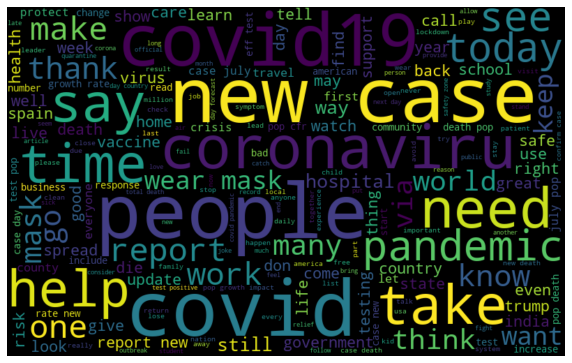

In [163]:
all_words = ''.join([text for text in combined_tweet])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## SENTIMENT USING TEXTBLOB

In [153]:
from textblob import TextBlob

In [154]:
senten=TextBlob(combined_tweet)

In [155]:
senten.sentiment.polarity

0.08145753427250772